In [7]:
import pandas as pd
from db_utils import Plotter, DataTransform
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from db_utils import Plotter, DataFrameTransform
from IPython.display import display

PL = Plotter()
DFT = DataFrameTransform()

df = pd.read_csv('data2.csv')
columns = ['open_accounts','total_accounts','out_prncp','out_prncp_inv', 'annual_inc', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'dti', 'instalment', 'int_rate','delinq_2yrs', 'inq_last_6mths']

def remove_and_cap_with_zscore_from_video(): #TEST COMPLETE, SUCCESS
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_z_score_vid_trim = DFT.z_score_trim_vidver(df, columns) # new_df, has been trimmed, test successful!
        PL.plot_boxplots(df_z_score_vid_trim, columns) # makes boxplots, test unsuccessful!
        
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_z_score_vid_capping = DFT.z_score_cap_vidver(df, columns) # new_df2, has been trimmed, test successful!
        PL.plot_boxplots(df_z_score_vid_capping, columns) # makes boxplots, test successful!
        return df_z_score_vid_trim, df_z_score_vid_capping

def remove_and_cap_with_zscore_from_notebook():#TEST COMPLETE, SUCCESS
        DFT.create_z_score_df(df, columns)
        
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_trimmed_by_z_score = DFT.trim_by_z_score(df, columns)
        PL.plot_boxplots(df_trimmed_by_z_score, columns)
        
        PL.plot_boxplots(df, columns) # makes boxplots, test successful!
        df_capped_by_z_score = DFT.cap_by_z_score(df, columns)
        PL.plot_boxplots(df_capped_by_z_score, columns) # makes boxplots, test successful!
        
def remove_and_cap_with_iqr_from_notebook():#TEST COMPLETE, SUCCESS
        PL.plot_boxplots(df, columns)
        df_trimmed_by_iqr = DFT.trim_by_iqr_limits(df, columns)
        PL.plot_boxplots(df_trimmed_by_iqr, columns)
        
        PL.plot_boxplots(df, columns)
        df_capped_by_limits = DFT.cap_by_limits(df, columns)
        PL.plot_boxplots(df_capped_by_limits, columns)
#remove_and_cap_with_zscore_from_video()
#remove_and_cap_with_zscore_from_notebook()
#remove_and_cap_with_iqr_from_notebook()

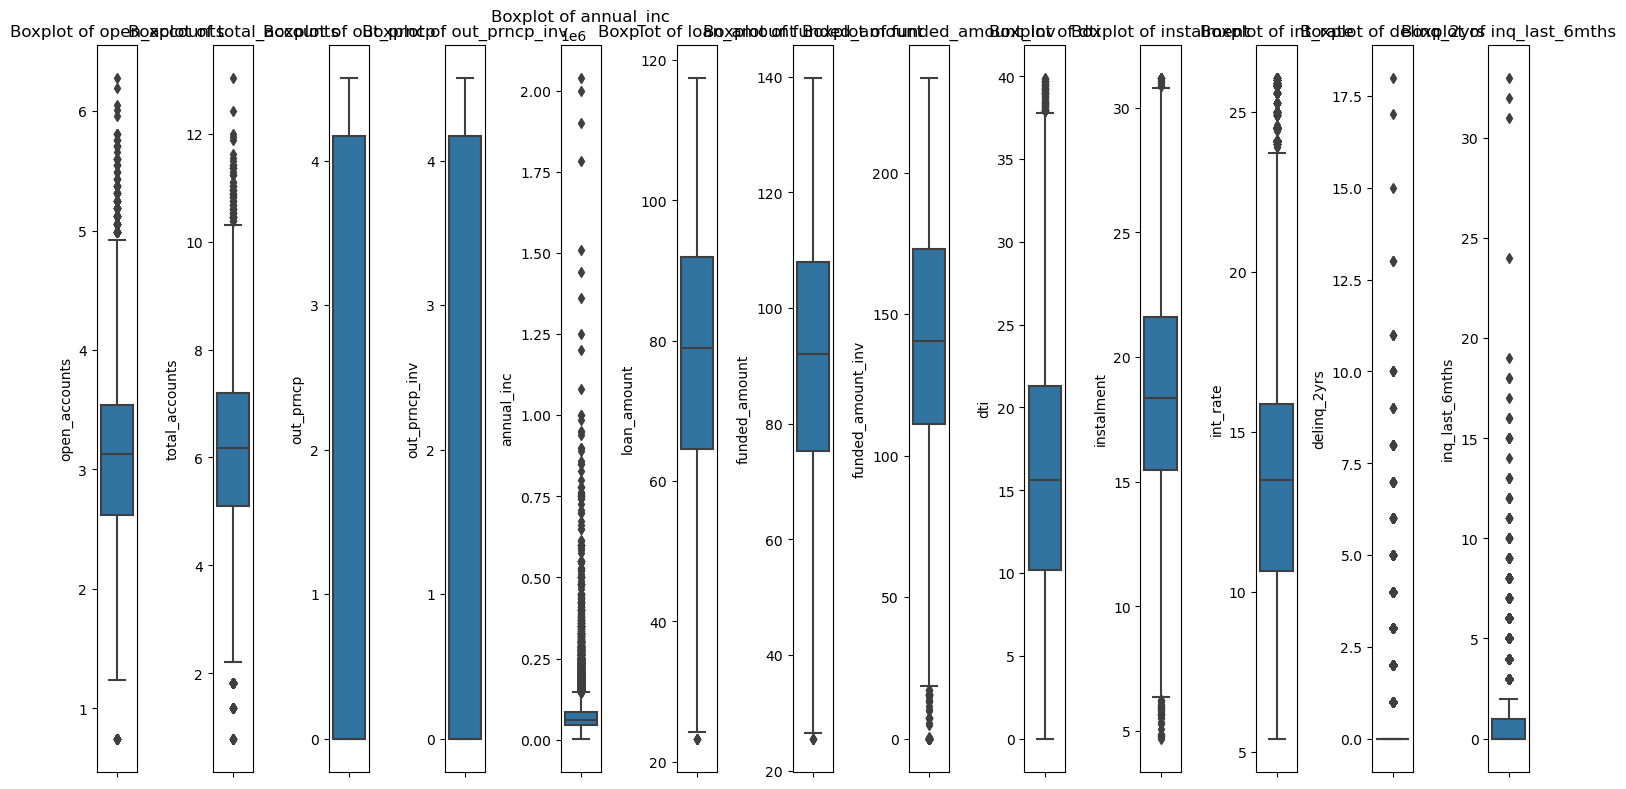

899 outliers removed using zscore with vid trimming method


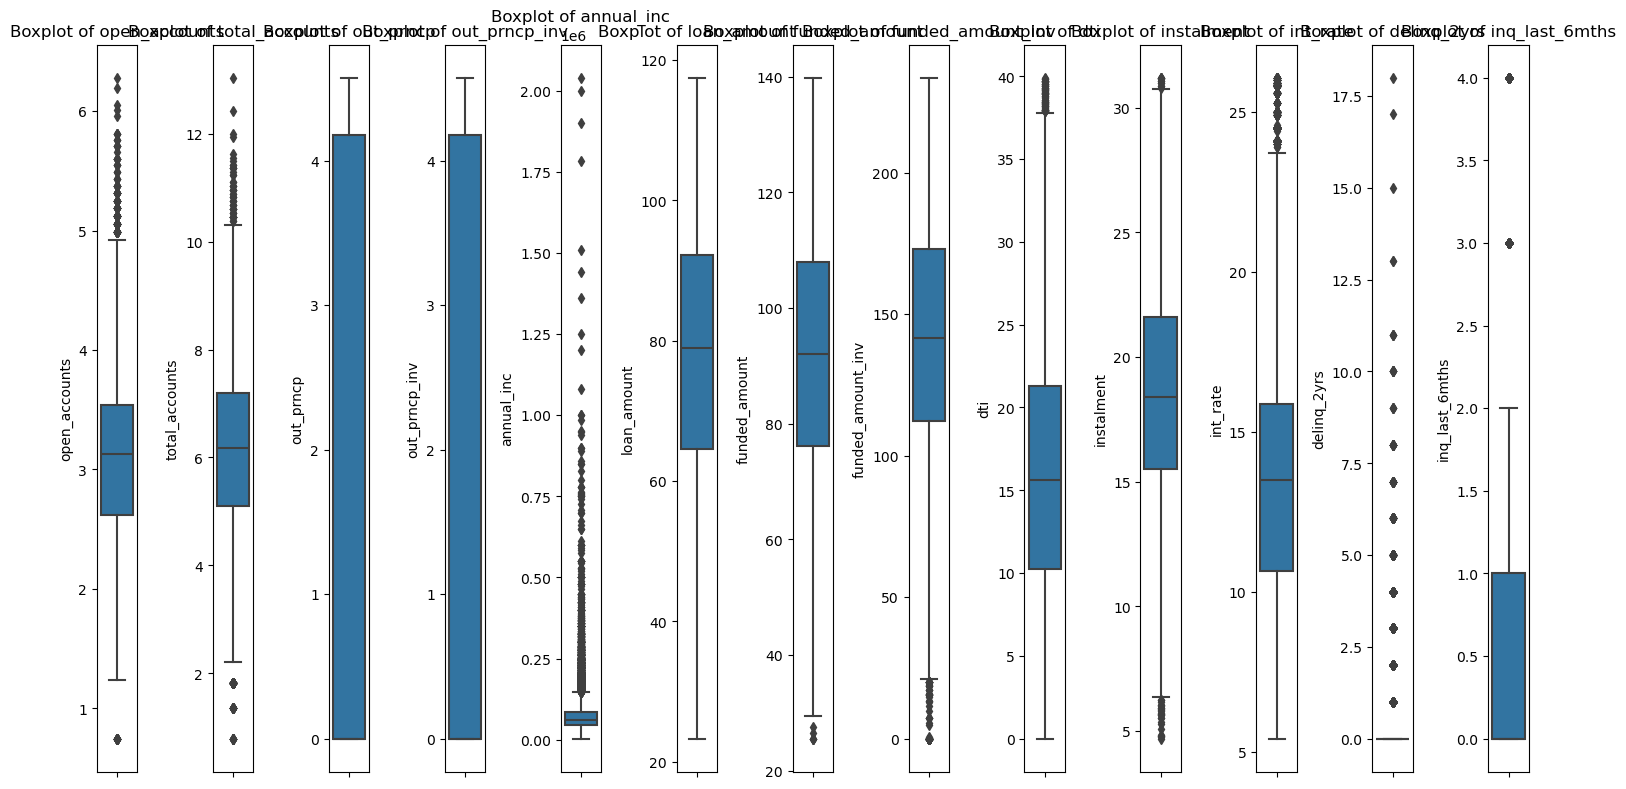

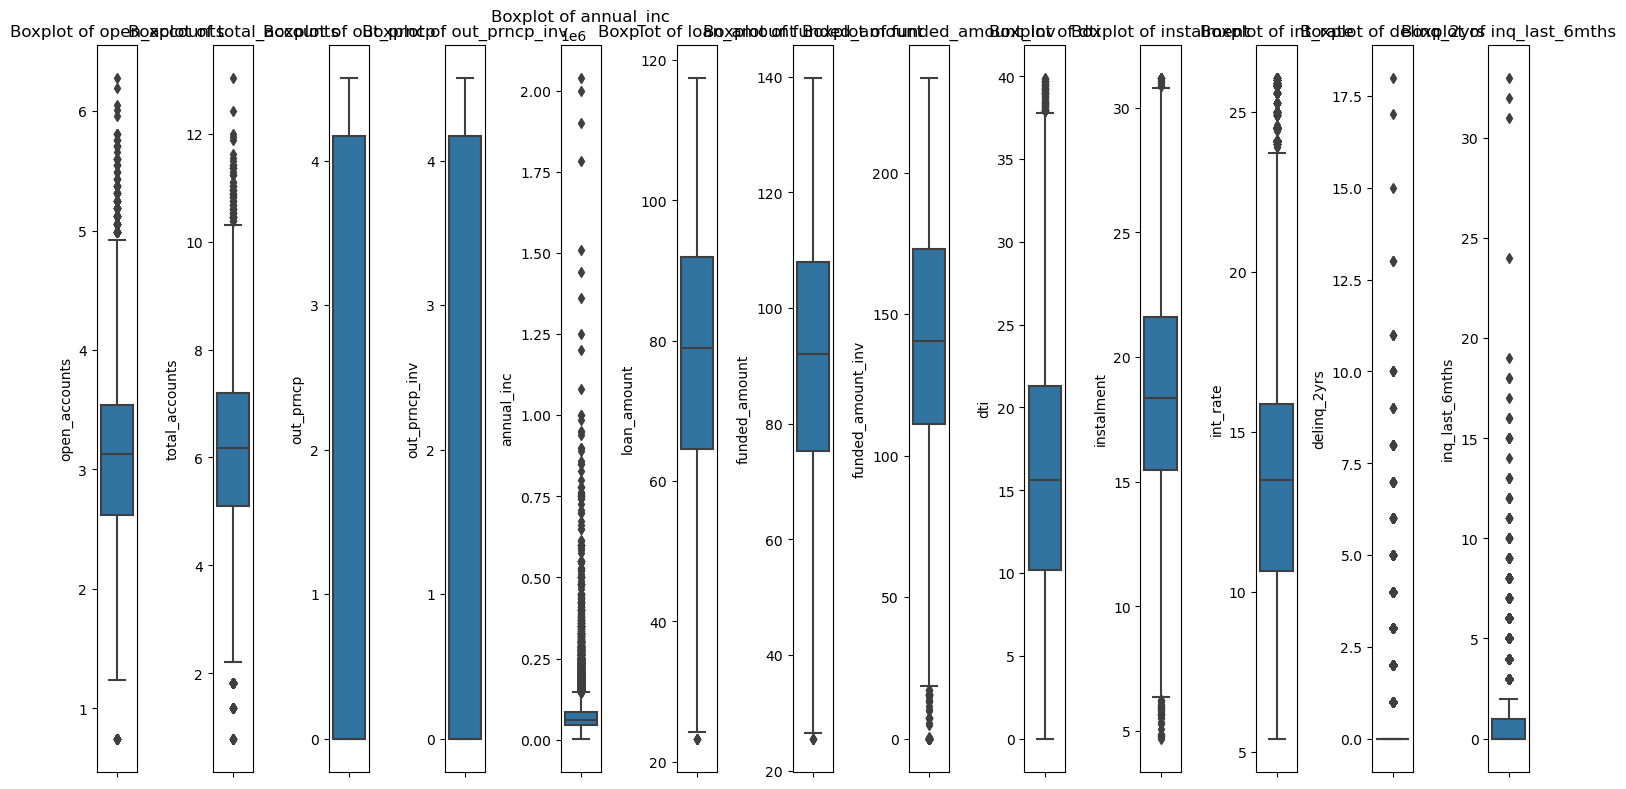

c:\Users\james\Documents\GitHub\exploratory-data-analysis---customer-loans-in-finance489\db_utils.py:379: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.360695789627937' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z_score_vid_capping.loc[df_z_score_vid_capping[i]>upper_limit, i] = upper_limit
c:\Users\james\Documents\GitHub\exploratory-data-analysis---customer-loans-in-finance489\db_utils.py:379: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.674745181692097' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z_score_vid_capping.loc[df_z_score_vid_capping[i]>upper_limit, i] = upper_limit


0 outliers removed using zscore with vid capping method


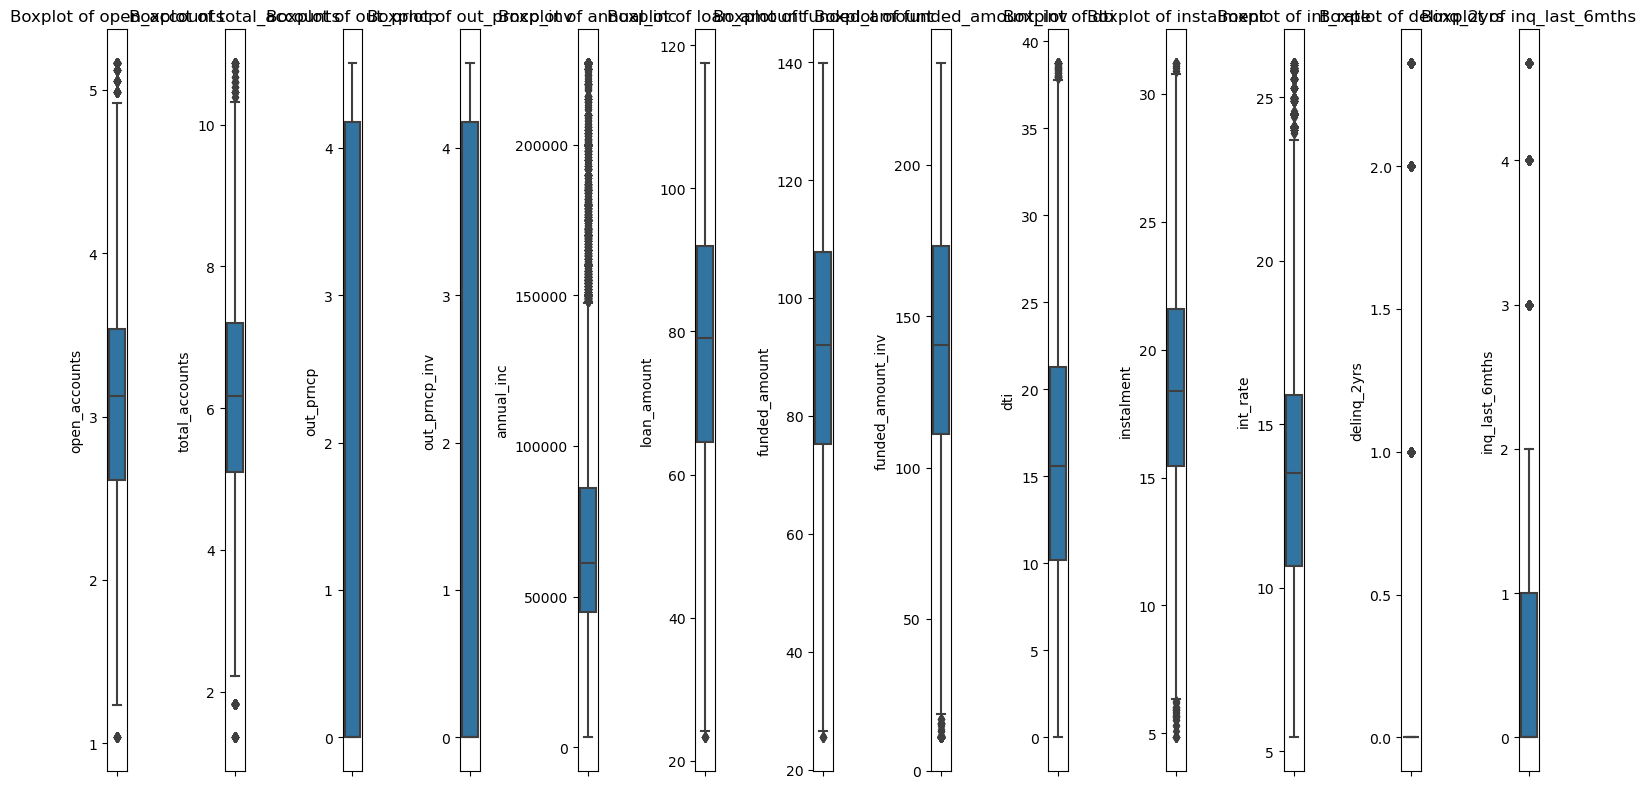

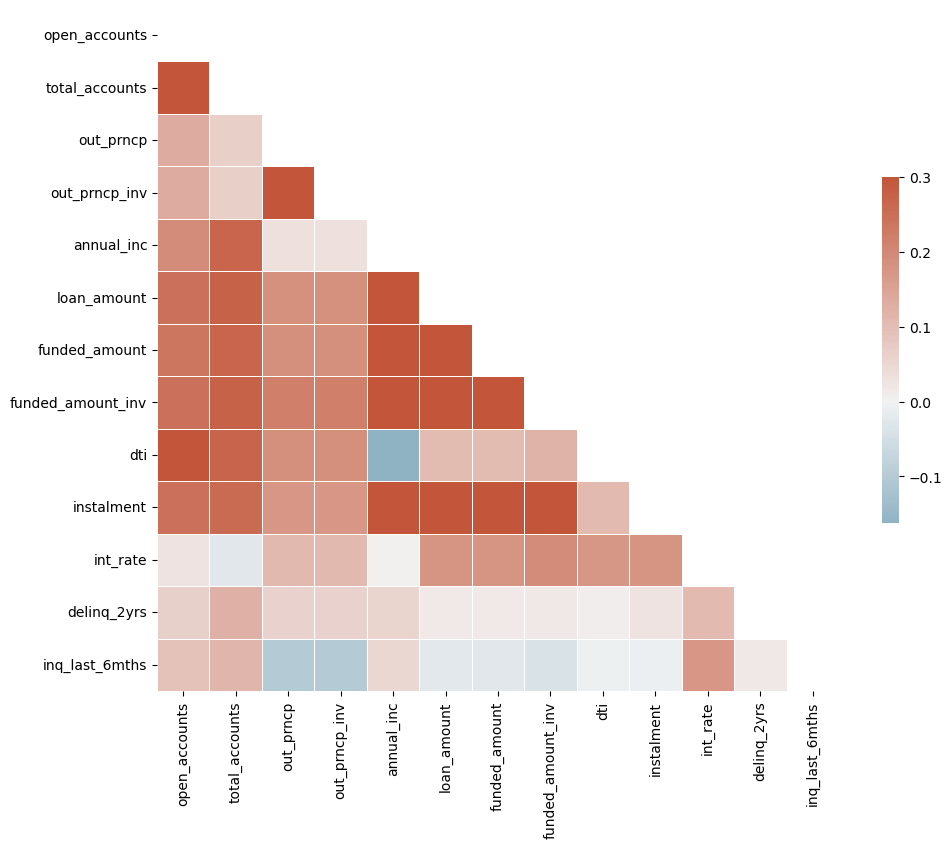

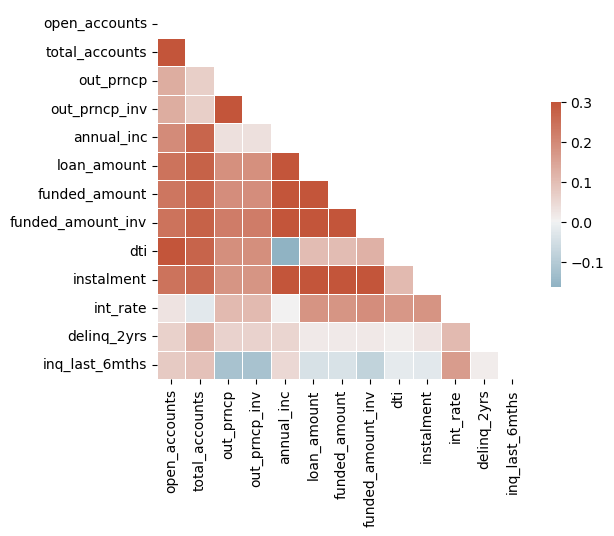

In [11]:

df_z_score_vid_trim, df_z_score_vid_capping = remove_and_cap_with_zscore_from_video()
#print(df_z_score_vid_trim.columns)
# Compute the correlation matrix

corr = df_z_score_vid_trim[(columns)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


corr = df[(columns)].corr()
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()